In [60]:
#Ici , on va appliquer les algorithmes de machine learning sur le dataset de succès commercial des films.
#On affiche d'abord la tete du dataset
import pandas as pd 
df = pd.read_csv('movie_dataset_commercial_success.csv')
print(df.head())

      budget                                    genres original_language  \
0  237000000  Action Adventure Fantasy Science Fiction                en   
1  300000000                  Adventure Fantasy Action                en   
2  245000000                    Action Adventure Crime                en   
3  250000000               Action Crime Drama Thriller                en   
4  260000000          Action Adventure Science Fiction                en   

   runtime  vote_average           director  Action  Adventure  Animation  \
0    162.0           7.2      James Cameron    True       True      False   
1    169.0           6.9     Gore Verbinski    True       True      False   
2    148.0           6.3         Sam Mendes    True       True      False   
3    165.0           7.6  Christopher Nolan    True      False      False   
4    132.0           6.1     Andrew Stanton    True       True      False   

   Comedy  ...  Movie  Music  Mystery  Romance  Science     TV  Thriller  \
0   

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# Copier le DataFrame
df_model = df.copy()

# Encoder les colonnes catégorielles 'genres' et 'director' (one-hot encoding)
df_model = pd.get_dummies(df_model, columns=['genres', 'director' , 'original_language'])



# Séparer features et target
X = df_model.drop('succes_commercial', axis=1)
y = df_model['succes_commercial']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Prédiction
y_pred = clf.predict(X_test)

# Calcul de la précision (precision)
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision of Decision Tree (with director): {precision:.4f}')

#Nombre de correctement classés
correctly_classified = (y_test == y_pred).sum()
print(f'Number of correctly classified samples: {correctly_classified} sur {len(y_test)}')

Precision of Decision Tree (with director): 0.7835
Number of correctly classified samples: 679 sur 952


In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

# Copier le DataFrame
df_model = df.copy()

# Encoder uniquement la colonne 'genres' (one-hot encoding)
df_model = pd.get_dummies(df_model, columns=['genres' , 'director', 'original_language'])


# Séparer features et target
X = df_model.drop('succes_commercial', axis=1)
y = df_model['succes_commercial']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle Random Forest

rf_clf = RandomForestClassifier(n_estimators=8, random_state=42 , max_features=None , class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Prédiction
y_pred = rf_clf.predict(X_test)

# Calcul de la précision (precision)
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision of Random Forest: {precision:.4f}')


Precision of Random Forest: 0.8569


Evaluating cv=2...
Evaluating cv=3...
Evaluating cv=4...
Evaluating cv=5...
Evaluating cv=6...
Evaluating cv=7...
Evaluating cv=8...
Evaluating cv=9...
Evaluating cv=10...
Evaluating cv=11...
Evaluating cv=12...
Evaluating cv=13...
Evaluating cv=14...
Evaluating cv=15...
Evaluating cv=16...
Evaluating cv=17...
Evaluating cv=18...
Evaluating cv=19...


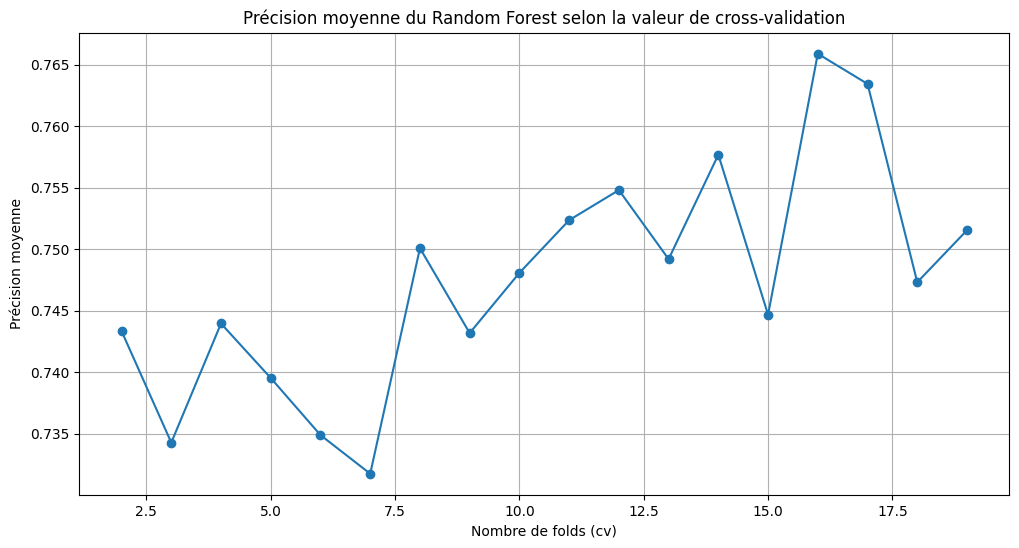

In [113]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Copier le DataFrame
df_model = df.copy()

# Encoder uniquement la colonne 'genres' (one-hot encoding)
df_model = pd.get_dummies(df_model, columns=['genres' ,'director', 'original_language'])



# Séparer features et target
X = df_model.drop('succes_commercial', axis=1)
y = df_model['succes_commercial']

# Listes pour stocker les résultats
cv_values = list(range(2, 20))  # Cross-validation de 2 à 50
precision_scores = []

# Boucle sur les différentes valeurs de cross-validation
for cv in cv_values:
    print(f'Evaluating cv={cv}...')
    rf_clf = RandomForestClassifier(n_estimators=8, random_state=42)
    scores = cross_val_score(rf_clf, X, y, cv=cv, scoring='precision')  # Précision comme métrique
    precision_scores.append(scores.mean())

# Graphique
plt.figure(figsize=(12, 6))
plt.plot(cv_values, precision_scores, marker='o', linestyle='-')
plt.title('Précision moyenne du Random Forest selon la valeur de cross-validation')
plt.xlabel('Nombre de folds (cv)')
plt.ylabel('Précision moyenne')
plt.grid(True)
plt.show()


In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score

# Copier le DataFrame
df_model = df.copy()

# Encoder uniquement la colonne 'genres' (one-hot encoding)
df_model = pd.get_dummies(df_model, columns=['genres'])

# Supprimer les colonnes à ignorer
df_model = df_model.drop(columns=['director', 'original_language'], errors='ignore')

# Séparer features et target
X = df_model.drop('succes_commercial', axis=1)
y = df_model['succes_commercial']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle Naive Bayes
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Prédiction
y_pred = nb_clf.predict(X_test)

# Calcul de la précision
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision of Naive Bayes: {precision:.4f}')


Precision of Naive Bayes: 0.6691


Precision of KNN: 0.7245
Precision moyenne (cross-validation 5 folds): 0.6980


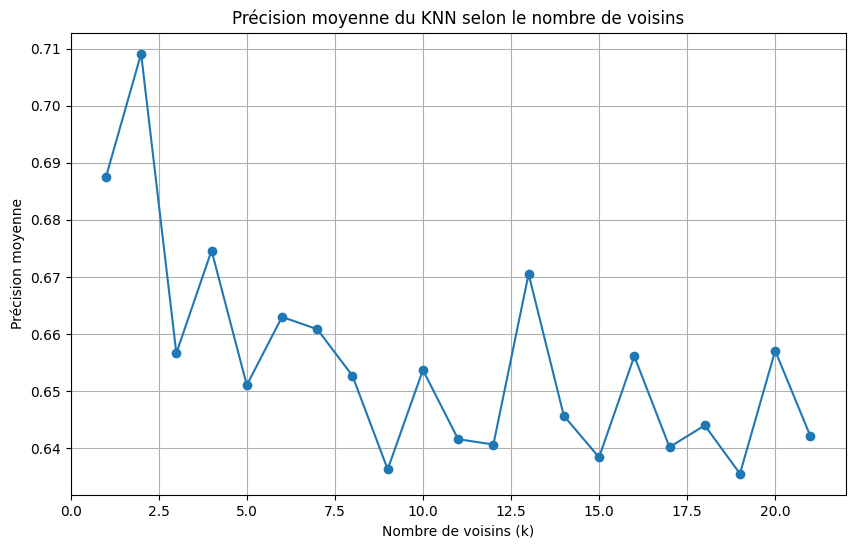

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

# Copier le DataFrame
df_model = df.copy()

# Encoder uniquement la colonne 'genres' (one-hot encoding)
df_model = pd.get_dummies(df_model, columns=['genres' , 'director', 'original_language'])


# Séparer features et target
X = df_model.drop('succes_commercial', axis=1)
y = df_model['succes_commercial']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Créer le modèle KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)  # tu peux ajuster n_neighbors

# Entraînement
knn_clf.fit(X_train, y_train)

# Prédiction
y_pred = knn_clf.predict(X_test)

# Calcul de la précision
precision = precision_score(y_test, y_pred, pos_label=1)
print(f'Precision of KNN: {precision:.4f}')

# Optionnel : cross-validation pour vérifier la précision moyenne
cv_scores = cross_val_score(knn_clf, X, y, cv=2, scoring='precision')
print(f'Precision moyenne (cross-validation 5 folds): {cv_scores.mean():.4f}')

# Optionnel : tester plusieurs k pour trouver le meilleur
k_values = list(range(1, 22))
cv_precisions = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='precision')
    cv_precisions.append(scores.mean())

plt.figure(figsize=(10,6))
plt.plot(k_values, cv_precisions, marker='o')
plt.title('Précision moyenne du KNN selon le nombre de voisins')
plt.xlabel('Nombre de voisins (k)')
plt.ylabel('Précision moyenne')
plt.grid(True)
plt.show()


Evaluating cv=2...
Evaluating cv=3...
Evaluating cv=4...
Evaluating cv=5...
Evaluating cv=6...
Evaluating cv=7...
Evaluating cv=8...
Evaluating cv=9...


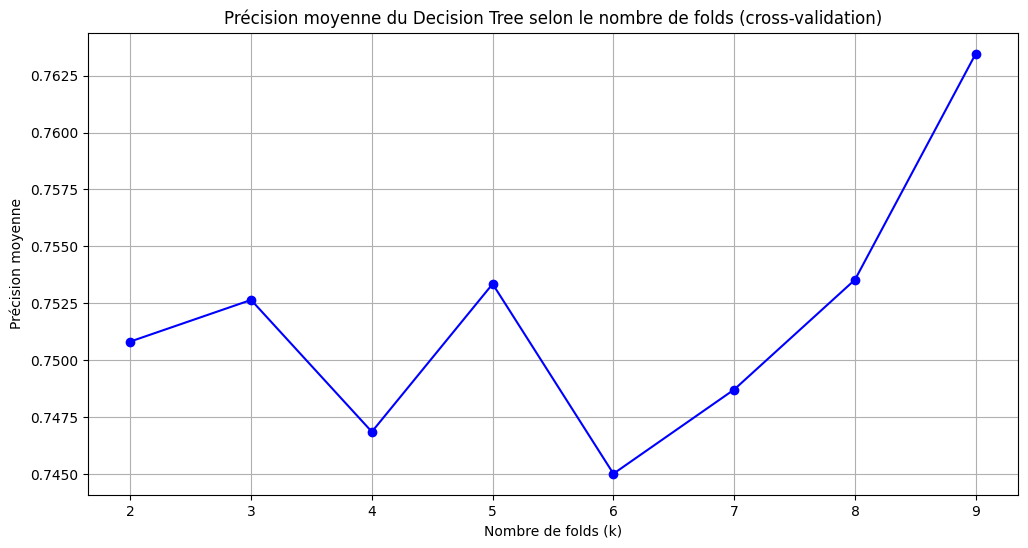

In [59]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Copier le DataFrame
df_model = df.copy()

# Encoder les colonnes catégorielles 'genres', 'director' et 'original_language'
df_model = pd.get_dummies(df_model, columns=['genres', 'director', 'original_language'])

# Séparer features et target
X = df_model.drop('succes_commercial', axis=1)
y = df_model['succes_commercial']

# Listes pour stocker les résultats
cv_values = list(range(2, 10))  # k de 2 à 20 pour la cross-validation
precision_scores = []

# Boucle sur les différentes valeurs de k
for cv in cv_values:
    print(f'Evaluating cv={cv}...')
    clf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=35)
    scores = cross_val_score(clf, X, y, cv=cv, scoring='precision')  # Précision comme métrique
    precision_scores.append(scores.mean())

# Graphique des scores de précision selon k
plt.figure(figsize=(12, 6))
plt.plot(cv_values, precision_scores, marker='o', linestyle='-', color='blue')
plt.title('Précision moyenne du Decision Tree selon le nombre de folds (cross-validation)')
plt.xlabel('Nombre de folds (k)')
plt.ylabel('Précision moyenne')
plt.grid(True)
plt.show()
